Import libraries

In [2]:
# import os
# os.environ['TF_USE_LEGACY_KERAS'] = '1'

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, InputLayer, Input
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

# import tensorflowjs as tfjs

Import data

In [3]:
df = pd.read_csv("../backend/dataset1.csv")
df.drop(columns=["rawData"], inplace = True)
df.head()

,pos,eyeDistance,shoulderDistance,eyeShoulderAngle,eyesNoseDistanceDiff,eyesShouldersY,noseEarsY
0,0,75.474941,356.550235,0.040094,0.175490,221.235151,19.782915
1,0,76.271106,355.333501,0.039938,0.126906,218.549280,25.467968
2,0,73.998752,352.383438,0.014419,0.146738,222.232819,19.077187
3,1,87.027394,345.468540,0.031495,0.192182,178.468819,28.269730
4,1,115.648331,374.838669,0.001412,0.123426,142.069397,72.939634


Split data into output and input

In [4]:
target_column = "pos"
output_column = df.drop(columns=[target_column])
output_rows = df[target_column]
df.drop(target_column, axis=1, inplace=True)
df.head()

,eyeDistance,shoulderDistance,eyeShoulderAngle,eyesNoseDistanceDiff,eyesShouldersY,noseEarsY
0,75.474941,356.550235,0.040094,0.175490,221.235151,19.782915
1,76.271106,355.333501,0.039938,0.126906,218.549280,25.467968
2,73.998752,352.383438,0.014419,0.146738,222.232819,19.077187
3,87.027394,345.468540,0.031495,0.192182,178.468819,28.269730
4,115.648331,374.838669,0.001412,0.123426,142.069397,72.939634


Scale data

In [5]:
# scaler = MinMaxScaler()
# scaler.fit(df)
# t_df = scaler.transform(df)

t_df = df

Split train and test data (investigate whether to stratify data later on)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(t_df, output_rows, test_size=0.25, random_state=1, stratify=output_rows)
# print(X_test)
# print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


Model

In [7]:
basic_model = Sequential()
basic_model.add(Dense(units=16, activation='relu', input_shape=[6,]))
basic_model.add(BatchNormalization())
basic_model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

Training

In [ ]:
basic_model.fit(X_train, y_train, epochs=500)

Results

In [9]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

1/1 [==============================] - 0s 224ms/step - loss: 0.1837 - accuracy: 0.8947
[0.18365246057510376, 0.8947368264198303]
Loss =  0.18365246057510376
Accuracy =  0.8947368264198303


Graphs

1/1 [==============================] - 0s 142ms/step


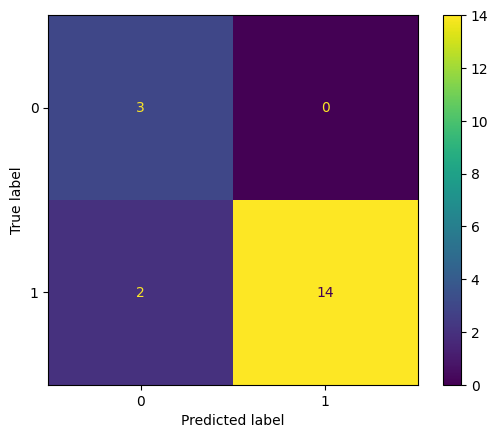

In [10]:
predicted = basic_model.predict(X_test)

predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

Save model

In [12]:
from datetime import datetime
now = datetime.now()

print(now)

formatted_string = now.strftime("%Y-%m-%d(%H:%M:%S)")

basic_model.save("./models/" + "test" + formatted_string + ".h5")

# tfjs.converters.save_keras_model(basic_model, "./testtfjsmodel2/")

# json_config = basic_model.to_json()
# with open('model_config5.json', 'w') as json_file:
#     json_file.write(json_config)
# # weights saving to disk
# basic_model.save_weights('model5.weights.h5')

2024-11-27 18:49:52.993804


/home/tsw/projects/strAIght/classifier/.convertvenv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
first_row = t_df.head(1)
print(first_row)
print(type(first_row))
t = tf.convert_to_tensor(first_row)
print(t)



   eyeDistance  shoulderDistance  eyeShoulderAngle  eyesNoseDistanceDiff  \
0    75.474941        356.550235          0.040094               0.17549   

   eyesShouldersY  noseEarsY  
0      221.235151  19.782915  
<class 'pandas.core.frame.DataFrame'>
tf.Tensor(
[[7.54749413e+01 3.56550235e+02 4.00936705e-02 1.75490231e-01
  2.21235151e+02 1.97829151e+01]], shape=(1, 6), dtype=float64)
